In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Cleaned_Data.csv")

In [3]:
vectorizer = TfidfVectorizer()

In [4]:
X = df["Clean_text"]
y = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [5]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

bnb = BernoulliNB()
bnb.fit(X_train_tfidf, y_train)

y_pred = bnb.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print("Classification Report:")

print("Accuracy on training data")
print(bnb.score(X_train_tfidf,y_train))

print("Accuracy on testing data")
print(bnb.score(X_test_tfidf,y_test))

print(report)

Accuracy on training data
0.8789033866002053
Accuracy on testing data
0.8192612137203166
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       427
           1       0.84      0.72      0.78       331

    accuracy                           0.82       758
   macro avg       0.82      0.81      0.81       758
weighted avg       0.82      0.82      0.82       758



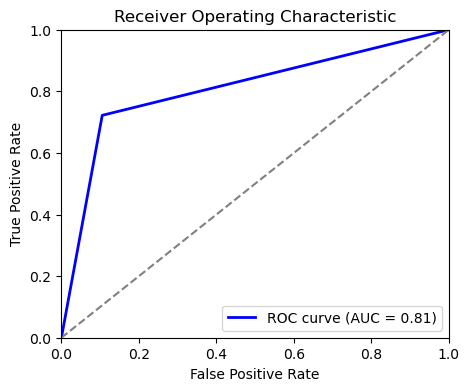

In [7]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()